<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/22_11_4677_Decision_Tree_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sakti Kusuma AJi | 22.11.4677 | tugas di paling bawah

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
!pip install chefboost
from chefboost import Chefboost as chef

In [3]:
# Importing the dataset
df = pd.read_csv('/content/PlayTennis.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play Tennis  14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [6]:
#show unique
for (columnName, columnData) in df.items(): # Changed iteritems() to items()
  print('Column Name : ', columnName)
  print('Column Unique : ', set(columnData.values) ,'\n')

Column Name :  Outlook
Column Unique :  {'Rain', 'Sunny', 'Overcast'} 

Column Name :  Temperature
Column Unique :  {'Hot', 'Mild', 'Cool'} 

Column Name :  Humidity
Column Unique :  {'Normal', 'High'} 

Column Name :  Wind
Column Unique :  {'Weak', 'Strong'} 

Column Name :  Play Tennis
Column Unique :  {'No', 'Yes'} 



In [7]:
# Tentukan config c4.5
config = {'algorithm':'C4.5'}
# Training the C4.5 model on the Training set
c45_model = chef.fit(df, config, target_label = 'Play Tennis')

24-11-29 06:37:47 - C4.5 tree is going to be built...
24-11-29 06:37:48 - -------------------------
24-11-29 06:37:48 - finished in 1.127295732498169 seconds
24-11-29 06:37:48 - -------------------------
24-11-29 06:37:48 - Evaluate train set
24-11-29 06:37:48 - -------------------------
24-11-29 06:37:48 - Accuracy: 100.0% on 14 instances
24-11-29 06:37:48 - Labels: ['No' 'Yes']
24-11-29 06:37:48 - Confusion matrix: [[5, 0], [0, 9]]
24-11-29 06:37:48 - Precision: 100.0%, Recall: 100.0%, F1: 100.0%


In [9]:
with open('/content/outputs/rules/rules.py', encoding='utf8') as f:
  for line in f:
    print(line.strip())

def findDecision(obj): #obj[0]: Outlook, obj[1]: Temperature, obj[2]: Humidity, obj[3]: Wind
# {"feature": "Outlook", "instances": 14, "metric_value": 0.9403, "depth": 1}
if obj[0] == 'Sunny':
# {"feature": "Humidity", "instances": 5, "metric_value": 0.971, "depth": 2}
if obj[2] == 'High':
return 'No'
elif obj[2] == 'Normal':
return 'Yes'
else:
return 'No'
elif obj[0] == 'Rain':
# {"feature": "Wind", "instances": 5, "metric_value": 0.971, "depth": 2}
if obj[3] == 'Weak':
return 'Yes'
elif obj[3] == 'Strong':
return 'No'
else:
return 'Yes'
elif obj[0] == 'Overcast':
return 'Yes'
else:
return 'Yes'


In [10]:
#predict berdasarkan row
print('Row :\n',df.loc[2])
print('\nPrediction : ',chef.predict(c45_model, df.loc[2]))

Row :
 Outlook        Overcast
Temperature         Hot
Humidity           High
Wind               Weak
Play Tennis         Yes
Name: 2, dtype: object

Prediction :  Yes


/content/outputs/rules/rules.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[0] == 'Sunny':
/content/outputs/rules/rules.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif obj[0] == 'Rain':
/content/outputs/rules/rules.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif obj[0] == 'Overcast':


In [11]:
#predict dengan inputan, masukkan secara berurutan value untuk fitur Outlook, Temperature, Humidity, dan Wind
#pastikan inputan yang dimasukkan sesuai dengan salah satu unique value pada masing-masing fitur
chef.predict(c45_model, param = ['Overcast', 'Hot', 'High', 'Weak'])

'Yes'

In [12]:
# Importing the libraries
import numpy as np
import pandas as pd
!pip install chefboost
from chefboost import Chefboost as chef

In [13]:
# Importing the dataset
df = pd.read_csv('/content/bank-full.csv')

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [16]:
#memilih categorical feature
categorical=[]
for col, value in df.items(): # Change iteritems() to items()
  if value.dtype == 'object':
    categorical.append(col)
# store the numerical columns in a list
df = df[categorical]

In [17]:
df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [18]:
#convert to numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_feature_select = df.copy()
for columnName in df_feature_select:
  df_feature_select[columnName] = le.fit_transform(df_feature_select[columnName])
df_feature_select.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,4,1,2,0,1,0,2,8,3,0
1,9,2,1,0,1,0,2,8,3,0
2,2,1,1,0,1,1,2,8,3,0
3,1,1,3,0,1,0,2,8,3,0
4,11,2,3,0,0,0,2,8,3,0


In [19]:
cor = df_feature_select.corr()
#Correlation with output variable
cor_target = abs(cor['housing'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

,housing
job,0.125363
housing,1.000000
contact,0.188123
month,0.271481
Target,0.139173


In [20]:
relevant_features_col = ['job', 'contact', 'month','Target','housing']

In [21]:
selected_df = df[relevant_features_col]

In [22]:
selected_df.head()

,job,contact,month,Target,housing
0,management,unknown,may,no,yes
1,technician,unknown,may,no,yes
2,entrepreneur,unknown,may,no,yes
3,blue-collar,unknown,may,no,yes
4,unknown,unknown,may,no,no


In [23]:
import pandas as pd # Make sure pandas is imported
df_train = selected_df.loc[selected_df['housing'] == 'yes'].head(200)
df_train_no = selected_df.loc[selected_df['housing'] == 'no'].head(200)
# Use pd.concat instead of append
df_train = pd.concat([df_train, df_train_no]).reset_index(drop=True)
# drop=True is used to avoid creating an extra 'index' column

In [24]:
df_test = selected_df.loc[selected_df['housing'] == 'yes'].tail(40)
df_test_no = selected_df.loc[selected_df['housing'] == 'no'].tail(40)
# Use pd.concat instead of append
df_test = pd.concat([df_test, df_test_no]).reset_index(drop=True)
# drop=True is used to avoid creating an extra 'index' column

In [25]:
# Tentukan config c4.5
config = {'algorithm':'C4.5'}
# Training the C4.5 model on the Training set
c45_model2 = chef.fit(df_train, config, target_label = 'housing')

24-11-29 06:40:45 - C4.5 tree is going to be built...
24-11-29 06:40:52 - -------------------------
24-11-29 06:40:52 - finished in 6.776158094406128 seconds
24-11-29 06:40:52 - -------------------------
24-11-29 06:40:52 - Evaluate train set
24-11-29 06:40:52 - -------------------------
24-11-29 06:40:52 - Accuracy: 54.0% on 400 instances
24-11-29 06:40:52 - Labels: ['yes' 'no']
24-11-29 06:40:52 - Confusion matrix: [[160, 144], [40, 56]]
24-11-29 06:40:52 - Precision: 52.6316%, Recall: 80.0%, F1: 63.4921%


In [26]:
with open('/content/outputs/rules/rules.py', encoding='utf8') as f:
  for line in f:
    print(line.strip())

def findDecision(obj): #obj[0]: job, obj[1]: contact, obj[2]: month, obj[3]: Target
# {"feature": "job", "instances": 400, "metric_value": 1.0, "depth": 1}
if obj[0] == 'blue-collar':
# {"feature": "Target", "instances": 94, "metric_value": 0.9987, "depth": 2}
if obj[3] == 'no':
# {"feature": "contact", "instances": 93, "metric_value": 0.9979, "depth": 3}
if obj[1] == 'unknown':
# {"feature": "month", "instances": 93, "metric_value": 0.9979, "depth": 4}
if obj[2] == 'may':
return 'yes'
else:
return 'yes'
else:
return 'yes'
elif obj[3] == 'yes':
return 'no'
else:
return 'yes'
elif obj[0] == 'management':
# {"feature": "contact", "instances": 66, "metric_value": 0.9993, "depth": 2}
if obj[1] == 'unknown':
# {"feature": "month", "instances": 66, "metric_value": 0.9993, "depth": 3}
if obj[2] == 'may':
# {"feature": "Target", "instances": 66, "metric_value": 0.9993, "depth": 4}
if obj[3] == 'no':
return 'yes'
else:
return 'yes'
else:
return 'yes'
else:
return 'yes'
elif obj[0] == 'technicia

In [27]:
#predict berdasarkan row
print('Row : ', selected_df.loc[0])
print('\nActual :',selected_df['housing'].loc[0])
print('Prediction : ',chef.predict(c45_model2, selected_df.loc[0]))

Row :  job        management
contact       unknown
month             may
Target             no
housing           yes
Name: 0, dtype: object

Actual : yes
Prediction :  yes


/content/outputs/rules/rules.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[0] == 'Sunny':
/content/outputs/rules/rules.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif obj[0] == 'Overcast':
/content/outputs/rules/rules.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  else:
/content/outputs/rules/rules.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, int

In [28]:
#predict dengan inputan, masukkan secara berurutan value untuk fitur job contact month Target
#pastikan inputan yang dimasukkan sesuai dengan salah satu unique value pada masing-masing fitur
chef.predict(c45_model2, param = ['unknown', 'cellular', 'nov', 'no'])

'no'

In [34]:
from sklearn.metrics import *

# Convert df_test to a list of lists or a NumPy array
# This will ensure that the prediction function receives the expected data format
# Instead of predicting all at once, iterate through each row and predict individually
predicted = [chef.predict(c45_model2, row) for row in df_test.values.tolist()]

# Now, you can use the 'predicted' variable in the classification_report
print(classification_report(df_test['housing'].values, predicted, zero_division=0))

              precision    recall  f1-score   support

          no       0.41      0.23      0.29        40
         yes       0.47      0.68      0.55        40

    accuracy                           0.45        80
   macro avg       0.44      0.45      0.42        80
weighted avg       0.44      0.45      0.42        80



In [35]:
!git clone https://github.com/RaczeQ/scikit-learn-C4.5-tree-classifier.git

Cloning into 'scikit-learn-C4.5-tree-classifier'...
remote: Enumerating objects: 17, done.
remote: Total 17 (delta 0), reused 0 (delta 0), pack-reused 17 (from 1)
Receiving objects: 100% (17/17), 7.08 KiB | 7.08 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [36]:
!mkdir /content/c45
!mv /content/scikit-learn-C4.5-tree-classifier/c45/* /content/c45
!rm -r /content/scikit-learn-C4.5-tree-classifier

In [37]:
from c45 import C45

In [38]:
df2 = df_feature_select[relevant_features_col]
df2.head()

,job,contact,month,Target,housing
0,4,2,8,0,1
1,9,2,8,0,1
2,2,2,8,0,1
3,1,2,8,0,1
4,11,2,8,0,0


In [39]:
X = df2.drop(columns=['housing']) # Use 'columns' keyword or axis='columns'
y = df2['housing']

In [40]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.20,
random_state = 0)

In [41]:
from c45 import C45
clf = C45(attrNames=X_train.columns)
clf.fit(X_train, y_train)

C45(attrNames=['job', 'contact', 'month', 'Target'])

In [42]:
from sklearn.tree import DecisionTreeClassifier, export_text
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()
# Train the model on the training data (X_train, y_train)
clf.fit(X_train, y_train)
# Get rules from the tree structure
tree_rules = export_text(clf, feature_names=list(X_train.columns))
# Display rules
print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- month <= 7.50
|   |--- month <= 0.50
|   |   |--- Target <= 0.50
|   |   |   |--- job <= 2.50
|   |   |   |   |--- job <= 0.50
|   |   |   |   |   |--- contact <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- contact >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- job >  0.50
|   |   |   |   |   |--- contact <= 0.50
|   |   |   |   |   |   |--- job <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- job >  1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- contact >  0.50
|   |   |   |   |   |   |--- job <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- job >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- job >  2.50
|   |   |   |   |--- job <= 6.50
|   |   |   |   |   |--- job <= 4.50
|   |   |   |   |   |   |--- job <= 3.50
|   |   |   |   |   |   |   |--- contact <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |  

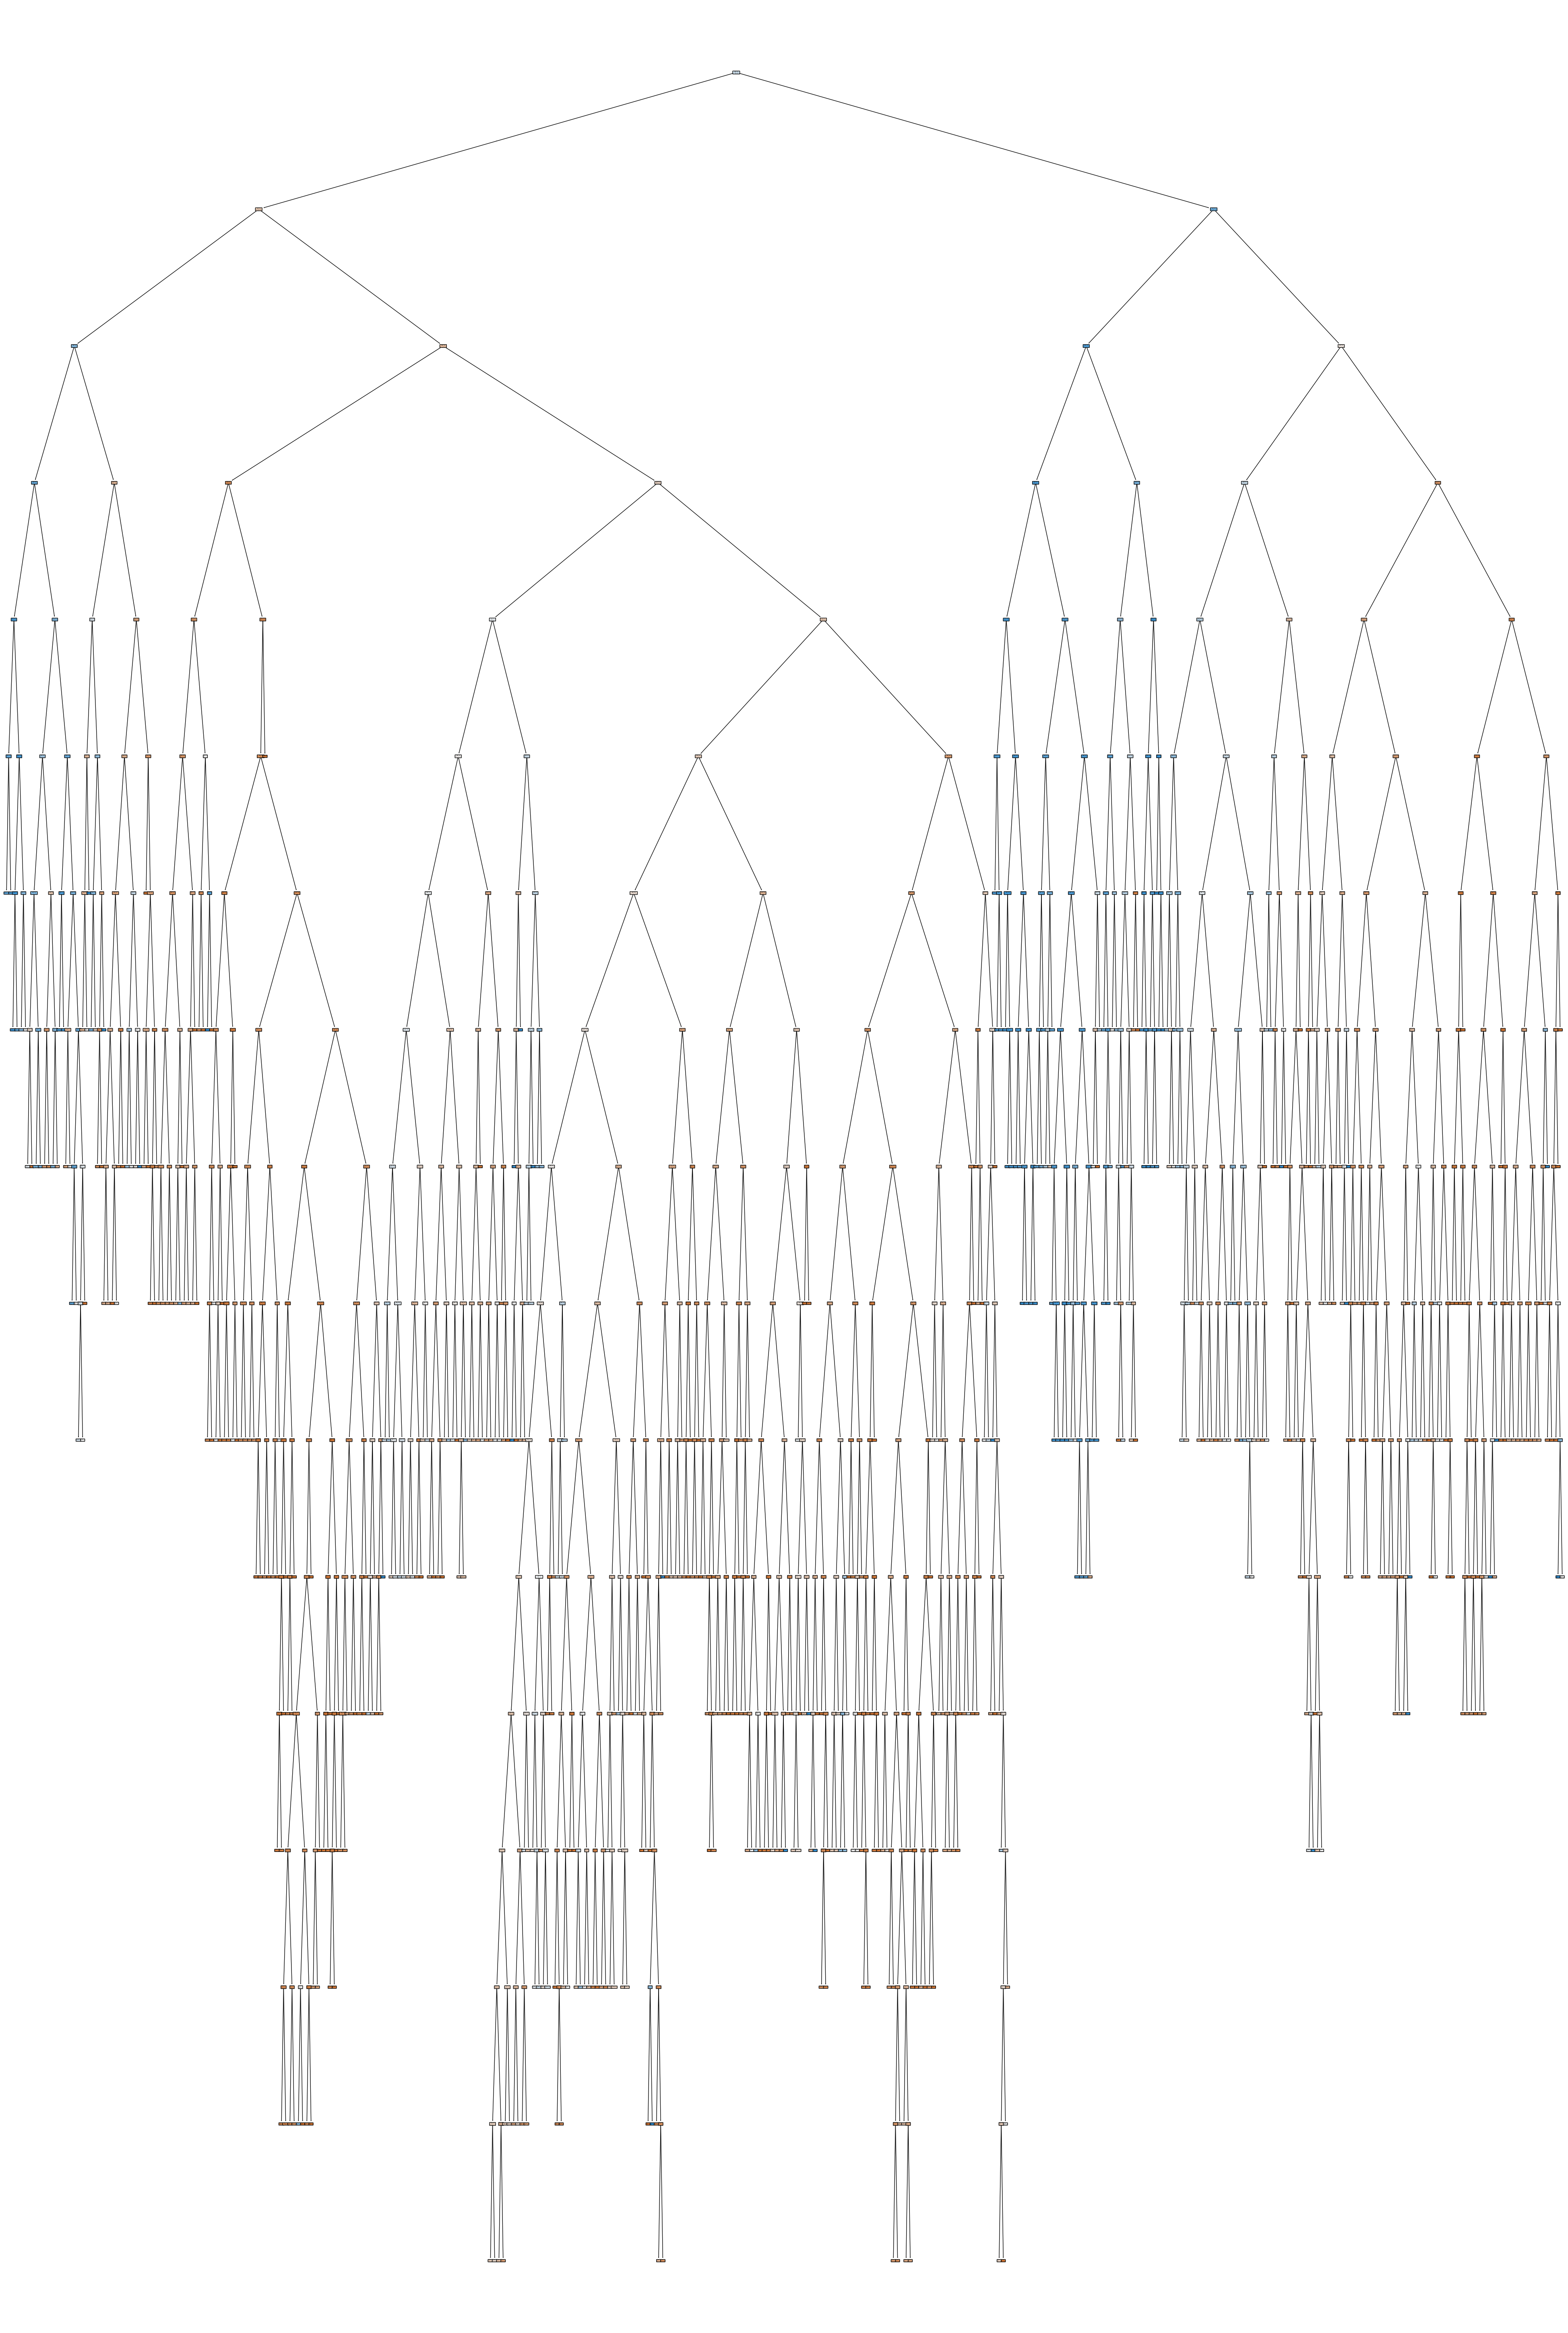

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()
# Train the model on the training data (X_train, y_train)
clf.fit(X_train, y_train)
# Plot the decision tree
plt.figure(figsize=(50, 75))
plot_tree(clf, filled=True, feature_names=list(X_train.columns), class_names=True, rounded=True)
plt.show()

In [44]:
predicted = clf.predict(X_test)

In [45]:
#predict dengan inputan, masukkan secara berurutan value untuk fitur job contact month Target
#pastikan inputan yang dimasukkan sesuai dengan salah satu unique value pada masing-masing fitur
chef.predict(c45_model2, param = ['entrepreneur', 'cellular', 'nov', 'yes'])

'yes'

In [46]:
from sklearn.metrics import *
print(classification_report(y_test,predicted,zero_division=0))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67      3949
           1       0.74      0.80      0.77      5094

    accuracy                           0.73      9043
   macro avg       0.73      0.72      0.72      9043
weighted avg       0.73      0.73      0.73      9043



# Tugas

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [57]:
df = pd.read_csv('/content/bank-full.csv')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [59]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


In [60]:
print(df.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [61]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [62]:
# Konversi kolom kategorikal menjadi numerik menggunakan Label Encoding
categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

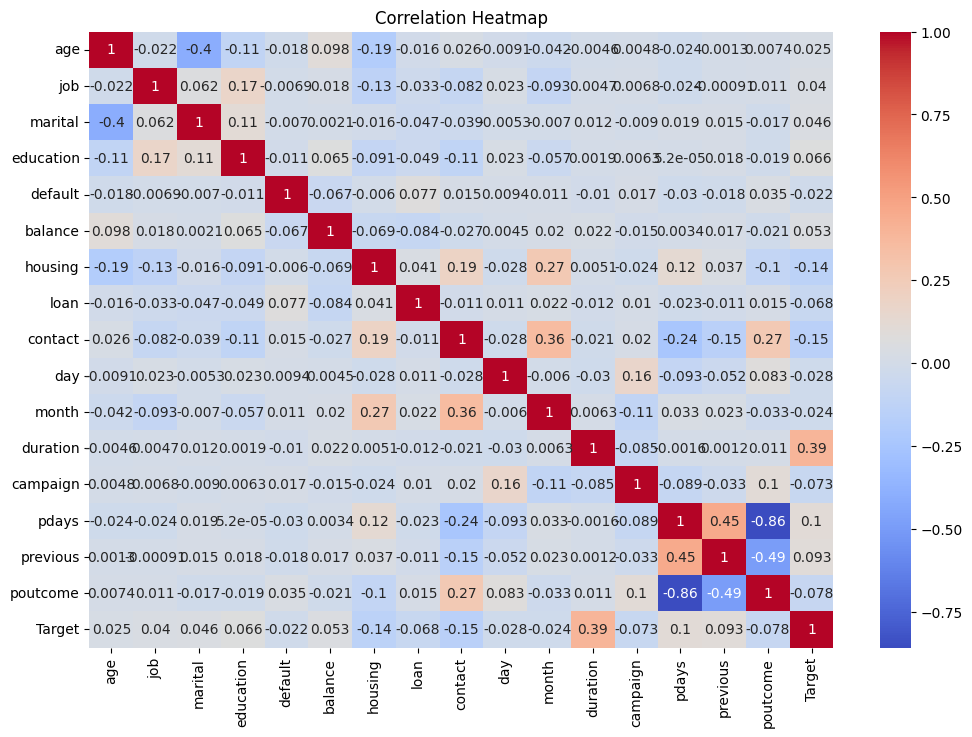

In [63]:
# Heatmap korelasi untuk melihat hubungan antar fitur
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Target', ylabel='count'>

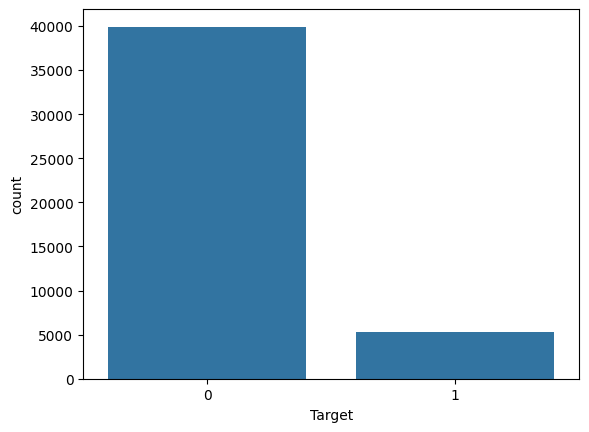

In [75]:
sns.countplot(x='Target', data=df)

In [70]:
X = df.drop('Target', axis=1)
y = df['Target']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
# 4. Latih Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [73]:
# 5. Prediksi dan Evaluasi
y_pred = rf.predict(X_test)

In [74]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9026098496018874
Confusion Matrix:
 [[11589   377]
 [  944   654]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.63      0.41      0.50      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564



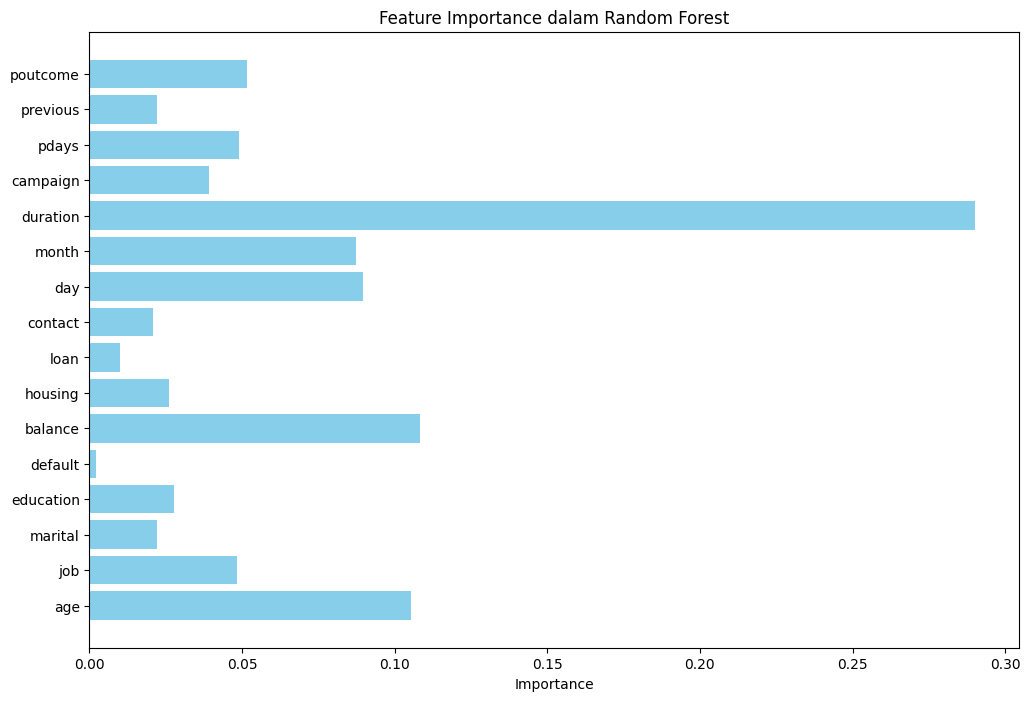

In [76]:
feature_importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(12, 8))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance dalam Random Forest')
plt.show()

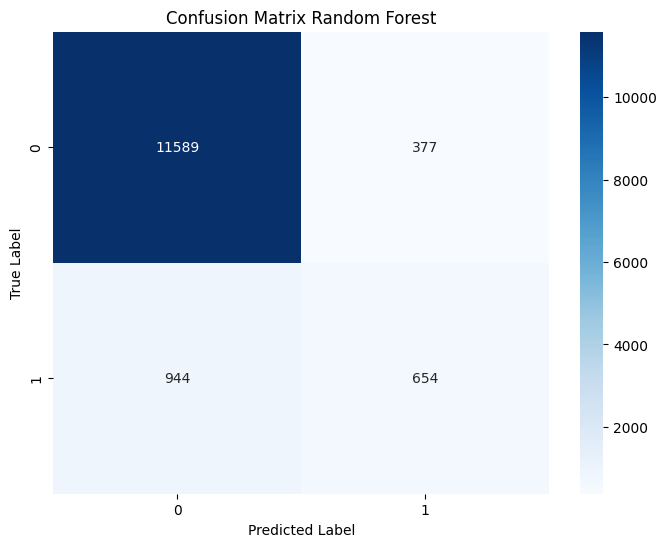

In [77]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Analisis dan Kesimpulan (dalam komentar)

Skor akurasi, confusion matrix, dan classification report dicetak untuk mengevaluasi performa model.

Random Forest umumnya berkinerja baik karena sifat ensemble-nya dan dapat mengurangi overfitting.

Heatmap korelasi memberikan wawasan tentang pentingnya fitur dan hubungan antar variabel,

membantu dalam memahami fitur mana yang paling berkontribusi pada prediksi target.

Visualisasi fitur penting menunjukkan fitur mana yang paling berpengaruh dalam model Random Forest.

Confusion matrix memberikan gambaran detail mengenai performa model dalam hal prediksi benar dan salah.

Skor akurasi akhir menunjukkan seberapa baik Random Forest classifier bekerja pada data uji.